In [1]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.colors as colors
import numpy as np 
import numpy.linalg as npl
from random import choices, seed
from pathlib import Path
import os
import sys
os.chdir('../')
from gen_geom import geom
from gen_obs import obs
obs = obs()
msh = geom()
domaine_size = msh.y.size * msh.x.size

path_case = os.getcwd()
path_data = path_case + '/data'

In [2]:
import pherosensor

from pheromone_dispersion.convection_diffusion_2D import DiffusionConvectionReaction2DEquation, Source
from pheromone_dispersion.diffusion_tensor import DiffusionTensor
from pheromone_dispersion.geom import MeshRect2D
from pheromone_dispersion.velocity import Velocity

from source_localization.cost import Cost
from source_localization.control import Control
from source_localization.adjoint_convection_diffusion_2D import AdjointDiffusionConvectionReaction2DEquation
from source_localization.obs import Obs

from utils.plot_ctrl import plot_ctrl
from utils.superlevel_set import *


In [3]:
colors_dic = {
    'no reg':                '#377eb8',   #'blue'   
    'reg pop dyn':           '#ff7f00',   #'orange'  
    'reg T':                 '#4daf4a',   #'green'   
    'reg LASSO':             '#f781bf',   #'pink'  
    'reg group LASSO':       '#dede00',   #'yellow'  
    'reg pop dyn + LASSO':   '#a65628',   #'brown'   
    'reg T + LASSO':         '#984ea3',   #'purple'  
    'reg pop dyn + T':       '#999999',   #'gray'    
    'all reg':               '#e41a1c',   #'red' 
} 

# Load and plot the output

## Load the target

In [4]:
S_value = np.load(Path(path_data) / 'S_target.npy')
ctrl_target = Control(Source(msh, S_value, t=msh.t_array), msh)
ctrl_target.value = np.copy(ctrl_target.background_value)

## Load the output with no reg

In [5]:
path_output = path_case + '/output_noreg'
S_o_no_reg = np.load(Path(path_output) / "S_optim.npy").reshape((msh.t_array.size, msh.y.size, msh.x.size))
ctrl_no_reg = Control(Source(msh, S_o_no_reg, t=msh.t_array), msh)
ctrl_no_reg.value = np.copy(ctrl_no_reg.background_value)
RMSE_liste_no_reg = [npl.norm(S_o_no_reg[i,:,:]-S_value[i,:,:]) / np.sqrt(domaine_size) for i,_ in enumerate(msh.t_array)]
RMSE_no_reg = np.array(RMSE_liste_no_reg)

no_reg = {
    'label': 'no reg', 
    'ctrl': ctrl_no_reg, 
    'ls': colors_dic['no reg'], 
    'RMSE': RMSE_no_reg, 
}

## Load the output with population dynamic reg

In [6]:
path_output = path_case + '/output_regPD'
S_o_reg_pop_dyn = np.load(Path(path_output) / "S_optim.npy").reshape((msh.t_array.size, msh.y.size, msh.x.size))
ctrl_reg_pop_dyn = Control(Source(msh, S_o_reg_pop_dyn, t=msh.t_array), msh)
ctrl_reg_pop_dyn.value = np.copy(ctrl_reg_pop_dyn.background_value)
RMSE_liste_reg_pop_dyn = [npl.norm(S_o_reg_pop_dyn[i,:,:]-S_value[i,:,:]) / np.sqrt(domaine_size) for i,_ in enumerate(msh.t_array)]
RMSE_reg_pop_dyn = np.array(RMSE_liste_reg_pop_dyn)
reg_pop_dyn = {
    'label': 'PD', 
    'ctrl': ctrl_reg_pop_dyn, 
    'ls': colors_dic['reg pop dyn'], 
    'RMSE': RMSE_reg_pop_dyn, 
}

## Load the output with Tikhonov reg

In [7]:
path_output = path_case + '/output_regT'
S_o_reg_T = np.load(Path(path_output) / "S_optim.npy").reshape((msh.t_array.size, msh.y.size, msh.x.size))
ctrl_reg_T = Control(Source(msh, S_o_reg_T, t=msh.t_array), msh)
ctrl_reg_T.value = np.copy(ctrl_reg_T.background_value)
RMSE_liste_reg_T = [npl.norm(S_o_reg_T[i,:,:]-S_value[i,:,:]) / np.sqrt(domaine_size) for i,_ in enumerate(msh.t_array)]
RMSE_reg_T = np.array(RMSE_liste_reg_T)
reg_T = {
    'label': 'T', 
    'ctrl': ctrl_reg_T, 
    'ls': colors_dic['reg T'], 
    'RMSE': RMSE_reg_T
}

## Load the output with LASSO reg

In [8]:
path_output = path_case + '/output_regLASSO'
S_o_reg_LASSO = np.load(Path(path_output) / "S_optim.npy").reshape((msh.t_array.size, msh.y.size, msh.x.size))
ctrl_reg_LASSO = Control(Source(msh, S_o_reg_LASSO, t=msh.t_array), msh)
ctrl_reg_LASSO.value = np.copy(ctrl_reg_LASSO.background_value)
RMSE_liste_reg_LASSO = [npl.norm(S_o_reg_LASSO[i,:,:]-S_value[i,:,:]) / np.sqrt(domaine_size) for i,_ in enumerate(msh.t_array)]
RMSE_reg_LASSO = np.array(RMSE_liste_reg_LASSO)
reg_LASSO = {
    'label': 'LASSO', 
    'ctrl': ctrl_reg_LASSO, 
    'ls': colors_dic['reg LASSO'], 
    'RMSE': RMSE_reg_LASSO, 
}

## Load the output with reg PD+LASSO


In [9]:
path_output = path_case + '/output_regPDLASSO'
S_o_PDLASSO_reg = np.load(Path(path_output) / "S_optim.npy").reshape((msh.t_array.size, msh.y.size, msh.x.size))
ctrl_PDLASSO_reg = Control(Source(msh, S_o_PDLASSO_reg, t=msh.t_array), msh)
ctrl_PDLASSO_reg.value = np.copy(ctrl_PDLASSO_reg.background_value)
RMSE_liste_PDLASSO_reg = [npl.norm(S_o_PDLASSO_reg[i,:,:]-S_value[i,:,:]) / np.sqrt(domaine_size) for i,_ in enumerate(msh.t_array)]
RMSE_PDLASSO_reg = np.array(RMSE_liste_PDLASSO_reg)
PDLASSO_reg = {
    'label': 'PD+LASSO', 
    'ctrl': ctrl_PDLASSO_reg, 
    'ls': colors_dic['reg pop dyn + LASSO'], 
    'RMSE': RMSE_PDLASSO_reg, 
}

## Load the output with reg T+LASSO


In [10]:
path_output = path_case + '/output_regLASSOT'
S_o_LASSOT_reg = np.load(Path(path_output) / "S_optim.npy").reshape((msh.t_array.size, msh.y.size, msh.x.size))
ctrl_LASSOT_reg = Control(Source(msh, S_o_LASSOT_reg, t=msh.t_array), msh)
ctrl_LASSOT_reg.value = np.copy(ctrl_LASSOT_reg.background_value)
RMSE_liste_LASSOT_reg = [npl.norm(S_o_LASSOT_reg[i,:,:]-S_value[i,:,:]) / np.sqrt(domaine_size) for i,_ in enumerate(msh.t_array)]
RMSE_LASSOT_reg = np.array(RMSE_liste_LASSOT_reg)
LASSOT_reg = {
    'label': 'T+LASSO', 
    'ctrl': ctrl_LASSOT_reg, 
    'ls': colors_dic['reg T + LASSO'], 
    'RMSE': RMSE_LASSOT_reg, 
}

## Load the output with reg PD+T


In [11]:
path_output = path_case + '/output_regPDT'
S_o_PDT_reg = np.load(Path(path_output) / "S_optim.npy").reshape((msh.t_array.size, msh.y.size, msh.x.size))
ctrl_PDT_reg = Control(Source(msh, S_o_PDT_reg, t=msh.t_array), msh)
ctrl_PDT_reg.value = np.copy(ctrl_PDT_reg.background_value)
RMSE_liste_PDT_reg = [npl.norm(S_o_PDT_reg[i,:,:]-S_value[i,:,:]) / np.sqrt(domaine_size) for i,_ in enumerate(msh.t_array)]
RMSE_PDT_reg = np.array(RMSE_liste_PDT_reg)
PDT_reg = {
    'label': 'PD+T', 
    'ctrl': ctrl_PDT_reg, 
    'ls': colors_dic['reg pop dyn + T'], 
    'RMSE': RMSE_PDT_reg, 
}

## Load the output with all reg


In [12]:
path_output = path_case + '/output_allreg'
S_o_all_reg = np.load(Path(path_output) / "S_optim.npy").reshape((msh.t_array.size, msh.y.size, msh.x.size))
ctrl_all_reg = Control(Source(msh, S_o_all_reg, t=msh.t_array), msh)
ctrl_all_reg.value = np.copy(ctrl_all_reg.background_value)
RMSE_liste_all_reg = [npl.norm(S_o_all_reg[i,:,:]-S_value[i,:,:]) / np.sqrt(domaine_size) for i,_ in enumerate(msh.t_array)]
RMSE_all_reg = np.array(RMSE_liste_all_reg)
all_reg = {
    'label': 'all reg', 
    'ctrl': ctrl_all_reg, 
    'ls': colors_dic['all reg'], 
    'RMSE': RMSE_all_reg, 
}

## Compare the outputs with different reg strategies

In [13]:
def plot_mean_error_comparison_vs_t(
    msh, 
    case_dict, 
    target_ctrl,
    save_flag=False, 
    save_path=None, 
    file_name=None, 
    mean_energie_vs_time=1,
    t_window = None,
    file_format='pdf',
): 
    if t_window is None: 
        t_window = [np.min(msh.t_array),np.max(msh.t_array)]
    i_tb = np.searchsorted(msh.t_array,t_window[0])
    i_te = np.searchsorted(msh.t_array,t_window[1])
    S_t = target_ctrl.value.reshape((msh.t_array.size, msh.y.size, msh.x.size))
    
    fontsize = 25
    fig, (ax_RMSE, ax_RMSE2) = plt.subplots(2,1, figsize=(20, 10), sharex=True)
    fig.subplots_adjust(hspace=0)
    for key in case_dict.keys():
        case = case_dict[key]
        
        S_o = case['ctrl'].value.reshape((msh.t_array.size, msh.y.size, msh.x.size))
        RMSE_support = np.zeros_like(msh.t_array)
        RMSE_complement_support = np.zeros_like(msh.t_array)
        for i,_ in enumerate(msh.t_array):
            support_size = S_t[i,S_t[i,:,:]!=0.].size
            complement_support_size = S_t[i,S_t[i,:,:]==0.].size
            RMSE_support[i] = npl.norm(S_o[i,S_t[i,:,:]!=0.]-S_t[i,S_t[i,:,:]!=0.]) / np.sqrt(support_size)
            RMSE_complement_support[i] = npl.norm(S_o[i,S_t[i,:,:]==0.]-S_t[i,S_t[i,:,:]==0.]) / np.sqrt(complement_support_size)

        ax_RMSE.plot(msh.t_array[i_tb:i_te], case['RMSE'][i_tb:i_te], color=case['ls'], label=case['label'])#r'on $\Omega_{supp}$')
        ax_RMSE2.plot(msh.t_array[i_tb:i_te], RMSE_support[i_tb:i_te], color=case['ls'])#, ls='--', label=r'on $\overline{\Omega}_{supp}$, '+case['label'])
        
    ax_RMSE.set_xlim(t_window[0], t_window[1])
    ax_RMSE.set_ylabel(r'$RxMSE_{tot}$', fontsize=fontsize)
    ax_RMSE.tick_params(labelsize=fontsize - 5)
    
    ax_RMSE2.set_xlim(t_window[0], t_window[1])
    ax_RMSE2.set_xlabel(r'$t$ ($s$)', fontsize=fontsize)
    ax_RMSE2.set_ylabel(r'$RxMSE_{supp}$', fontsize=fontsize)
    ax_RMSE2.tick_params(labelsize=fontsize - 5)
    
    line_RMSE, label_RMSE = ax_RMSE.get_legend_handles_labels()
    ax_RMSE.legend(line_RMSE,label_RMSE,prop={'size': fontsize},loc='upper left', ncol=4)
    
    if save_flag:
        fname = f"{file_name}."+file_format
        plt.savefig(Path(save_path) / fname, format=file_format, bbox_inches="tight")
    else :
        plt.show()

In [14]:
def plot_mulitple_ctrl_multiple_t(
    msh,
    iter_times,
    case_dict,
    ctrl_target=None,
    cmap="jet",
    map_bound=None,
    label='s',
    save_path=None,
    file_name=None,
    file_format='pdf',
    figsize=(20, 15),
    n_ligne=1
):
    
    if ctrl_target is not None:
        ctrl_target_map = ctrl_target.reshape((msh.t_array.size, msh.y.size, msh.x.size))
    else:
        ctrl_target_map = None
    
    vmin = np.inf
    vmax = -np.inf
    for index_case, key in enumerate(case_dict.keys()):
        case = case_dict[key]
        for index_time, index_t in enumerate(iter_times):  
            ctrl_current_t = case['ctrl'].value.reshape((msh.t_array.size, msh.y.size, msh.x.size))[index_t, :, :]
            vmin = np.min((vmin, np.min(ctrl_current_t)))
            vmax = np.max((vmax, np.max(ctrl_current_t)))        
        
    fontsize = 25
    unit = "g.m^{-2}.s^{-1}"
    
    nombre_col = np.int(np.ceil(len(case_dict)/n_ligne))
    nombre_ligne = np.int(len(iter_times)*n_ligne)
    nombre_temps = np.int(len(iter_times))
    fig, ax = plt.subplots(
        nombre_ligne, 
        nombre_col, 
        figsize=figsize, 
        sharex=True, 
        sharey=True
    )
    
    for index_case, key in enumerate(case_dict.keys()):
        case = case_dict[key]
        for index_time, index_t in enumerate(iter_times):
            ctrl_current_t = case['ctrl'].value.reshape((msh.t_array.size, msh.y.size, msh.x.size))[index_t, :, :]
            
            index_ligne = (index_case // (nombre_col)) * nombre_temps + index_time
            index_colonne = index_case % (nombre_col)
            
            if index_time == 0:
                title=case['label'] + f'\n\n at t = {"{:.1f}".format(msh.t_array[index_t])} s'
            else : 
                title="" + f'at t = {"{:.1f}".format(msh.t_array[index_t])} s'
                pos1 = ax[index_ligne, index_colonne].get_position() 
                pos2 = [pos1.x0, pos1.y0 + 0.015,  pos1.width, pos1.height] 
                ax[index_ligne, index_colonne].set_position(pos2) 
                
            ctrl_target_current_t = np.copy(ctrl_target_map[index_t, :, :])
            cntr = ax[index_ligne, index_colonne].contour(msh.x-np.min(msh.x), msh.y-np.min(msh.y), ctrl_target_current_t, colors='k', linestyles='dashed', levels=[np.max(ctrl_target_current_t)*0.5], linewidths=2.)
            fmt = ticker.LogFormatterMathtext()
            fmt.create_dummy_axis()
            ax[index_ligne, index_colonne].clabel(cntr, cntr.levels, inline=True, fontsize=fontsize, fmt=fmt)

            pcmesh = ax[index_ligne, index_colonne].pcolormesh(msh.x-np.min(msh.x), msh.y-np.min(msh.y), ctrl_current_t, cmap=cmap, vmin=vmin, vmax=vmax)
            
            ax[index_ligne, index_colonne].set_title(title, loc='center', fontsize=fontsize-5)
            ax[index_ligne, index_colonne].tick_params(labelsize=fontsize - 5)
            ax[index_ligne, index_colonne].set_aspect('equal', adjustable='box')

    fig.supxlabel('$x$ ($m$)', fontsize=fontsize, x=0.5, y=0.08)
    fig.supylabel('$y$ ($m$)', fontsize=fontsize, x=0.07, y=0.5)
    """
    for axis in ax[2:4, -1]:
        axis.remove()
    #cbar_ax = fig.add_axes([0.8, 0.125, 0.05, 0.35])
    """
    cbar_ax = fig.add_axes([0.92, 0.125, 0.01, 0.755])
    cbar = fig.colorbar(pcmesh, cax=cbar_ax)
    cbar_ax.tick_params(labelsize=fontsize - 5)
    cbar.set_label('$s_a$ ($pg.m^{-2}.s^{-1}$)', rotation=270, fontsize=fontsize, labelpad=40)
    if save_path is None:
        plt.show()
    else:
        if not os.path.isdir(Path(save_path)):
            os.makedirs(Path(save_path))
        if file_name is None:
            file_name = label
        plt.savefig(Path(save_path) / f"{file_name}.{file_format}", format=file_format, bbox_inches="tight")
        plt.close('all')


In [15]:
dic ={
    'no reg':no_reg, 
    'reg pop dyn':reg_pop_dyn, 
    'reg LASSO': reg_LASSO, 
    'reg T': reg_T, 
    'reg PD+LASSO':PDLASSO_reg, 
    'reg T+LASSO':LASSOT_reg, 
    'reg T+PD':PDT_reg,
    'reg all':all_reg
} 
save_plot_path = 'TO BE DEFINED'


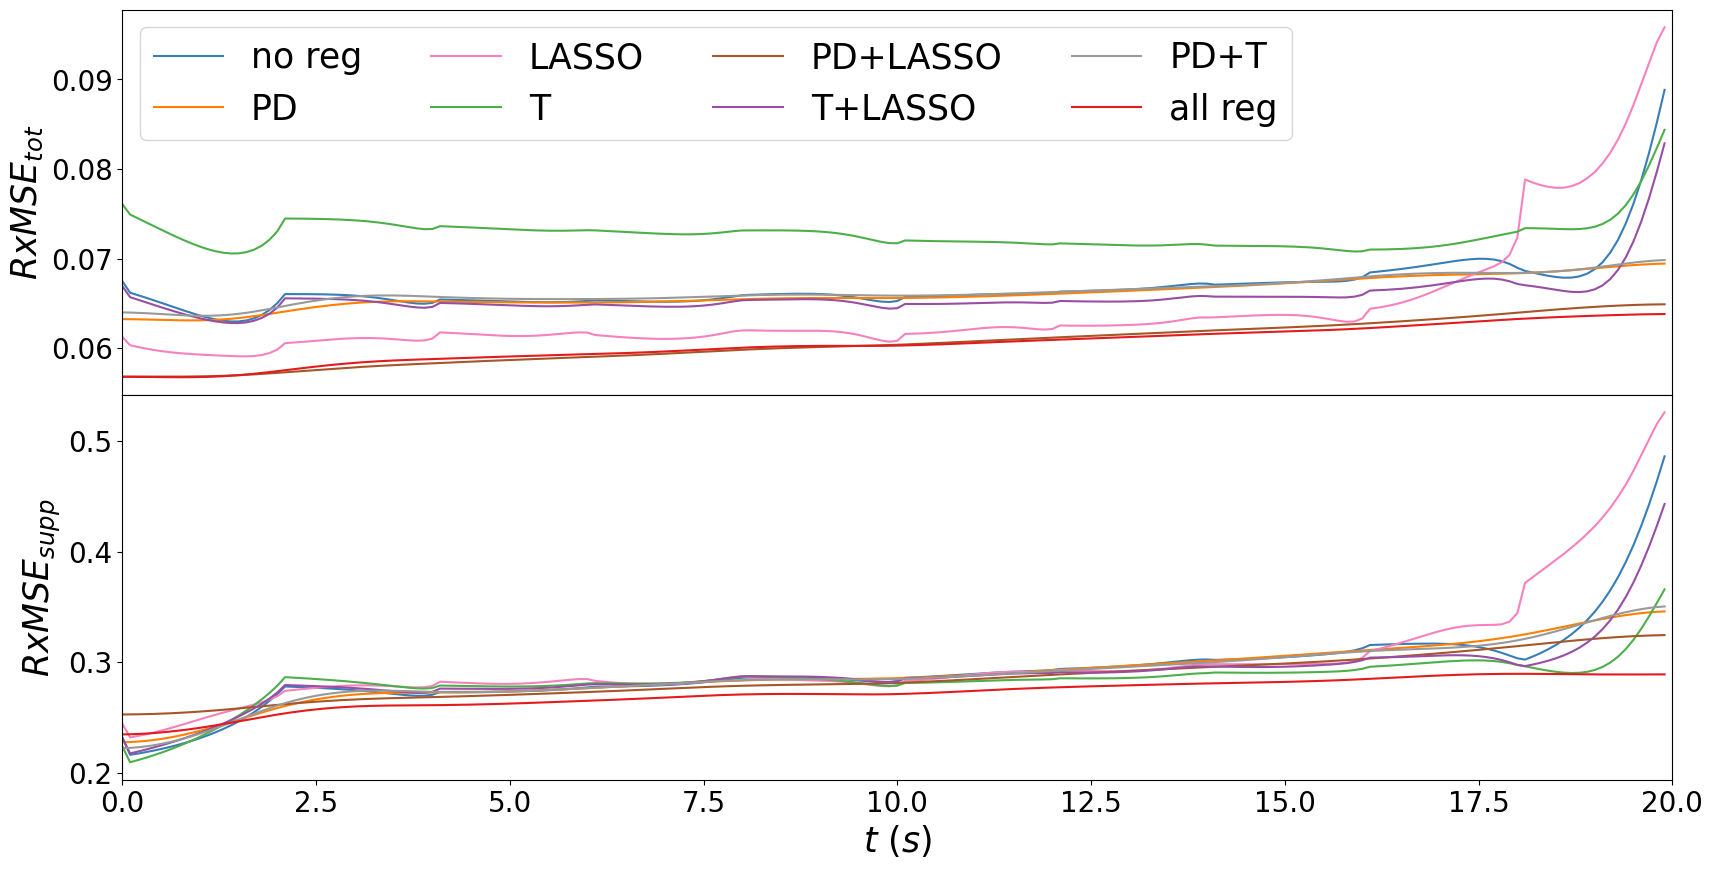

/home/tmalou/anaconda3/envs/pherosensor-new/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/home/tmalou/anaconda3/envs/pherosensor-new/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use

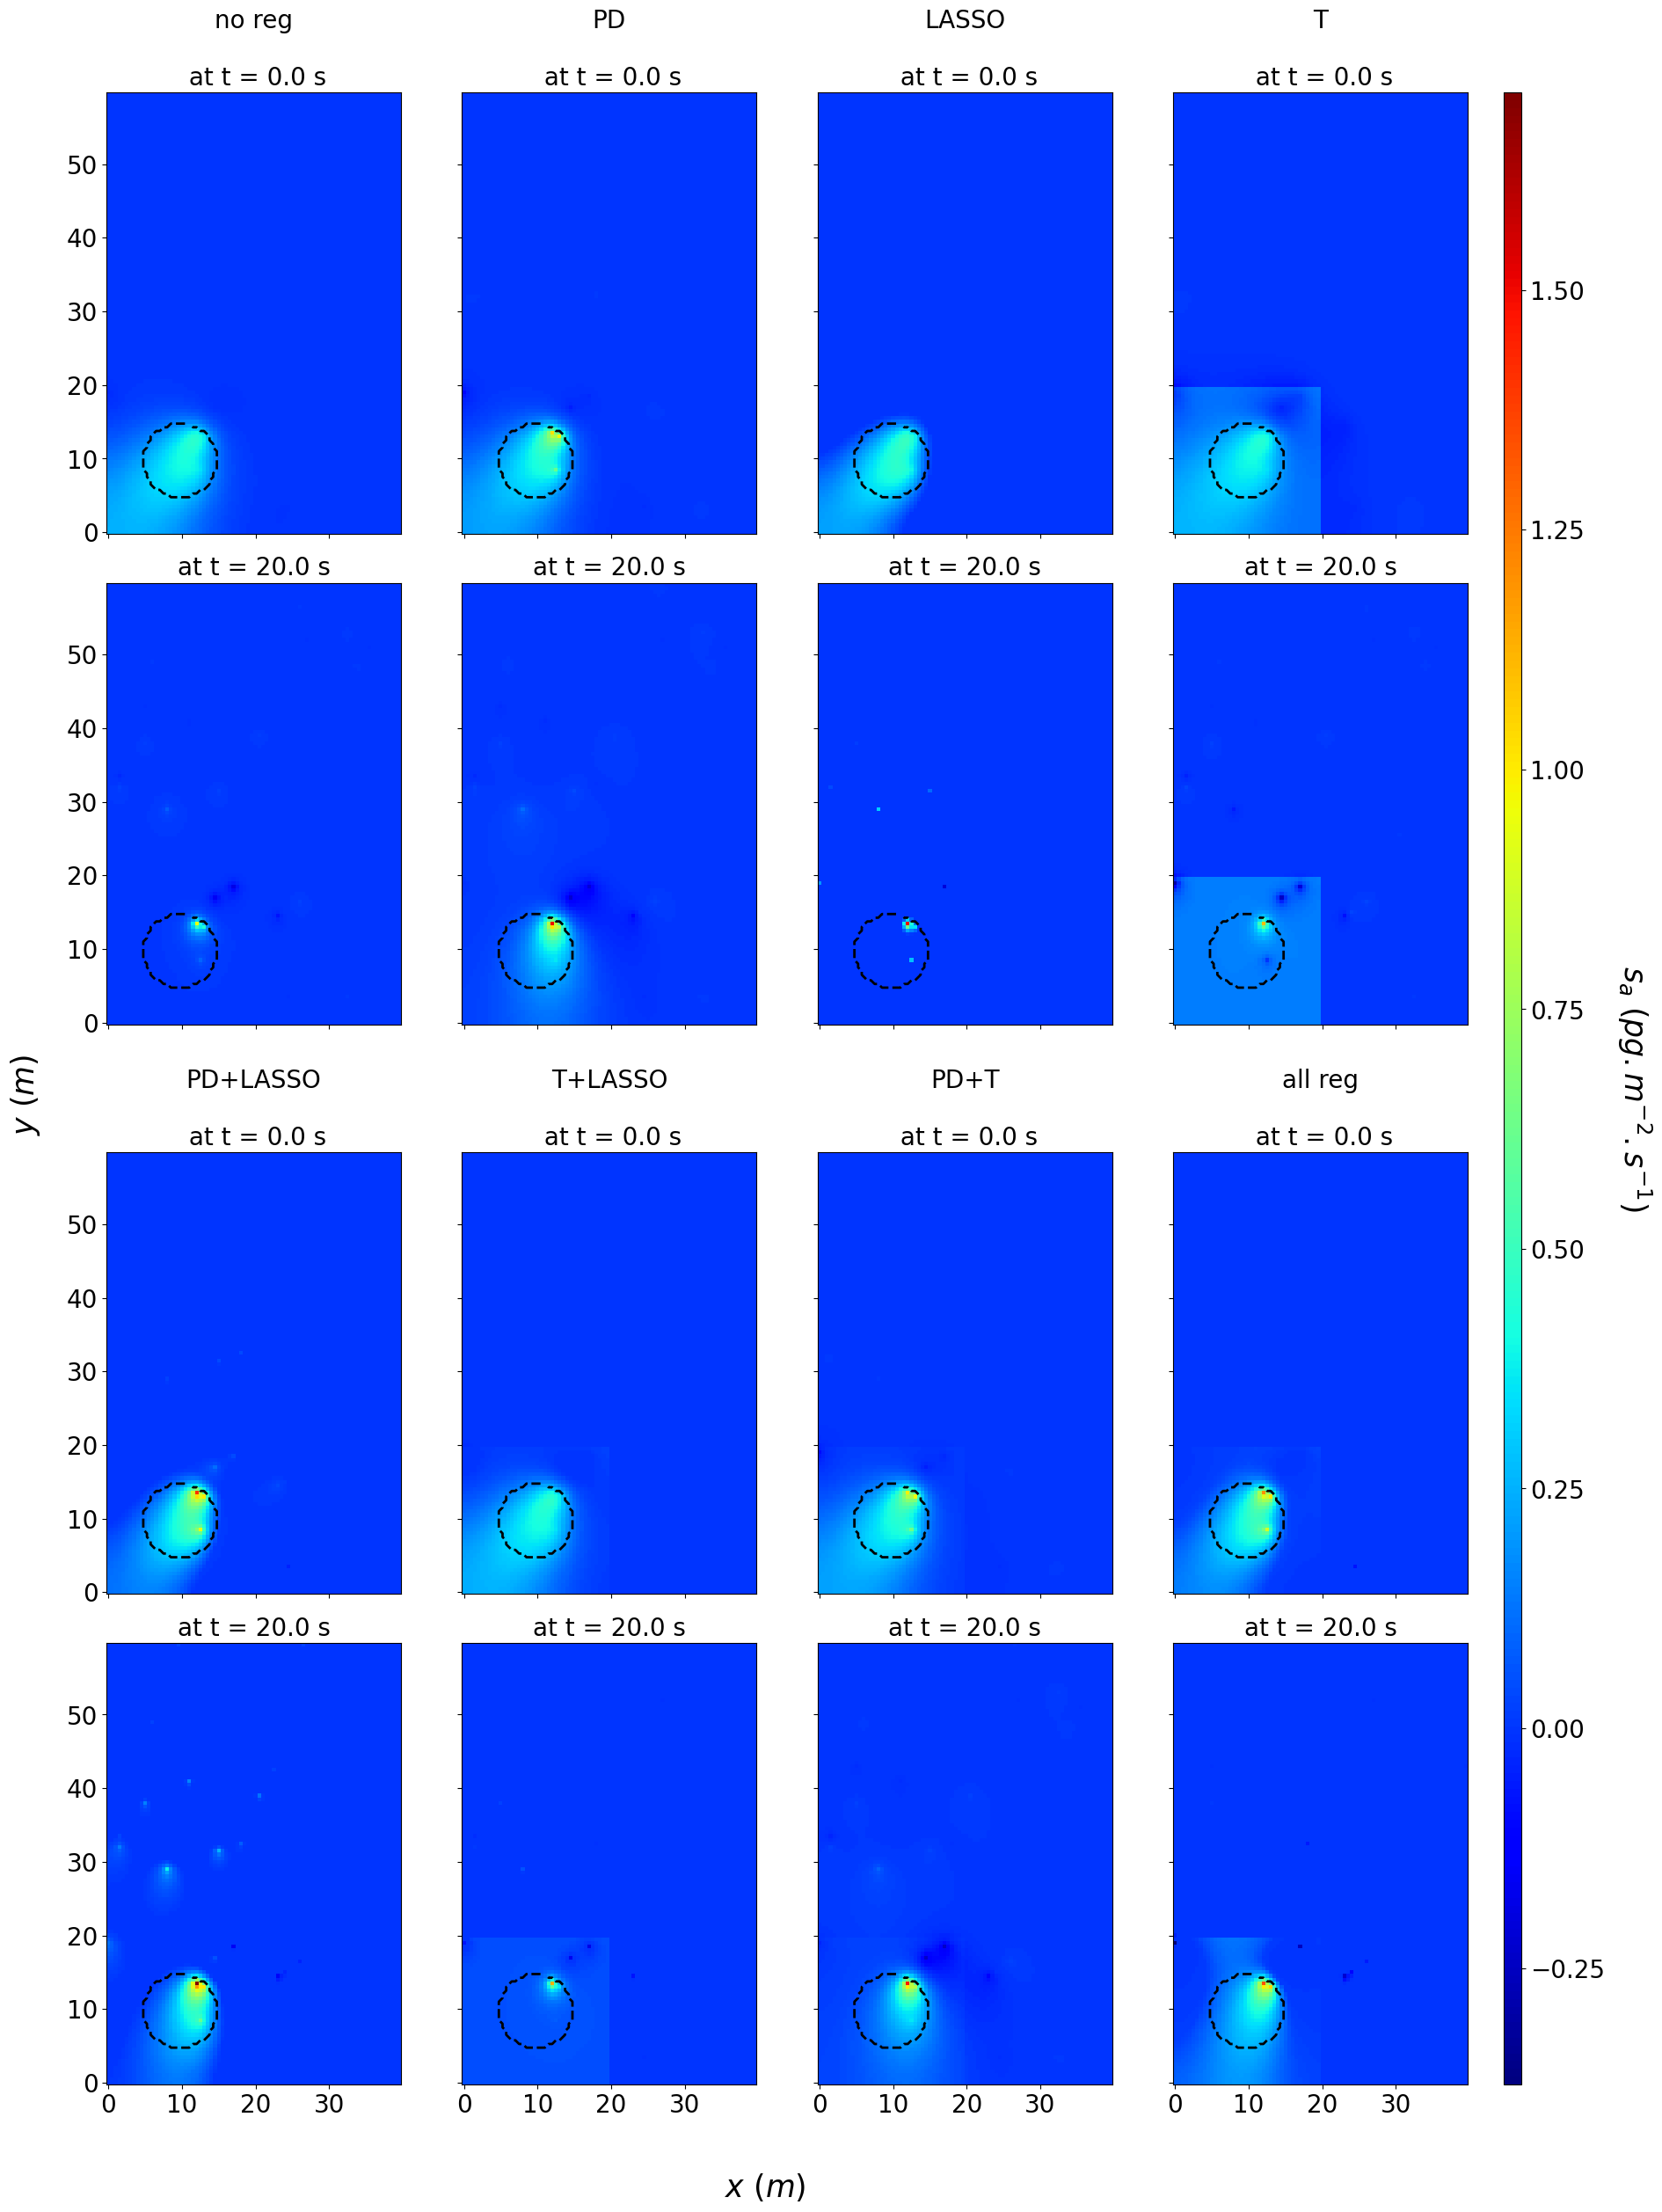

In [16]:
plot_mean_error_comparison_vs_t(
    msh, 
    dic,
    ctrl_target,
    #save_path=save_plot_path,
    #file_name='error_comp_reg', 
    #file_format='png', 
    #save_flag=True 
)
plot_mulitple_ctrl_multiple_t(
    msh,
    [0, 200],
    dic,
    ctrl_target=ctrl_target.value,
    cmap="jet",
    label='s_a',
    figsize=(20, 30),
    n_ligne=2,
    #save_path=save_plot_path,
    #file_name='s_optim_reg_comp',
    #file_format='png',
)